In [1]:
import seaborn as sns
import pandas as pd
import os
from sklearn.metrics import *
import matplotlib.pyplot as plt
import scanpy as sc


In [2]:
import palettable

method_order = [
    'Louvain','Leiden',
    'SpaGCN_without','SpaGCN_with','BayesSpace','stLearn','SEDR',
    'CCST','SCAN-IT','STAGATE','SpaceFlow','conST_nopre','BASS','DeepST'
]

cmp = palettable.tableau.Tableau_20.mpl_colors
method_color_dict = dict(zip(method_order,cmp))

In [3]:
pd_dict = {
    'replicate':[],
    'resolution':[],
    'ARI':[],
    'NMI':[],
    'algor_name':[]
}

In [4]:
method_order2=[
    'Louvain','Leiden',
    'SCAN-IT',
    'SpaceFlow'
    ]

In [5]:
for j in range(4):
    print(method_order2[j])
    path = f'/home/workspace2/zhaofangyuan/domain_output/osmfish_res/{method_order2[j]}'
    for file in os.listdir(path):
        file_whole = f'{path}/{file}'
        adata = sc.read_h5ad(file_whole)

        res = int(file[:-5].split('_')[-1])
        for i in range(5):
            obs_df = adata.obs.dropna()
            pred_label = obs_df[f'pred_{i+1}']
            true_label = obs_df['Region']

            # pred_label = adata.obs[f'pred_{i+1}']
            # true_label = adata.obs['Region']
            nmi = normalized_mutual_info_score(pred_label,true_label)
            ari = adjusted_rand_score(pred_label,true_label)
            
            pd_dict['replicate'].append(i)
            pd_dict['resolution'].append(res)        
            pd_dict['ARI'].append(ari)
            pd_dict['NMI'].append(nmi)
            pd_dict['algor_name'].append(method_order2[j])
        


Louvain
Leiden
SCAN-IT
SpaceFlow


In [6]:
pd_df = pd.DataFrame(pd_dict)

In [7]:
pd_df

,replicate,resolution,ARI,NMI,algor_name
0,0,600,0.341919,0.393709,Louvain
1,1,600,0.341919,0.393709,Louvain
2,2,600,0.341919,0.393709,Louvain
3,3,600,0.341919,0.393709,Louvain
4,4,600,0.341919,0.393709,Louvain
...,...,...,...,...,...
180,0,900,0.371531,0.601269,SpaceFlow
181,1,900,0.374683,0.604321,SpaceFlow
182,2,900,0.357524,0.585596,SpaceFlow
183,3,900,0.381760,0.613412,SpaceFlow


In [8]:
pd_df.sort_values(by="resolution" , inplace=True, ascending=True) 
pd_df

,replicate,resolution,ARI,NMI,algor_name
26,1,500,0.282314,0.351560,Louvain
82,2,500,0.298950,0.354607,Leiden
81,1,500,0.298950,0.354607,Leiden
29,4,500,0.282314,0.351560,Louvain
80,0,500,0.298950,0.354607,Leiden
...,...,...,...,...,...
103,3,950,0.386060,0.607485,SCAN-IT
101,1,950,0.364354,0.585712,SCAN-IT
100,0,950,0.364354,0.585712,SCAN-IT
104,4,950,0.364354,0.585712,SCAN-IT


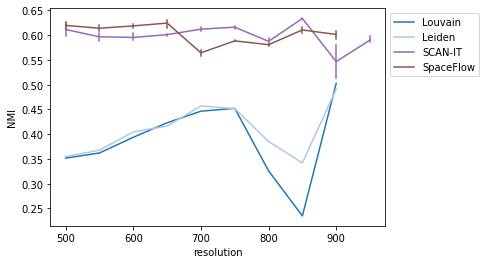

In [9]:
sns.lineplot(
    data=pd_df,
    x='resolution',
    y='NMI',
    hue="algor_name",

    palette=method_color_dict,
    hue_order=method_order,

    legend = False,
    err_style='bars')


# plt.legend(labels = ['Day1','Day2'],loc = 2, bbox_to_anchor = (1,1))
plt.legend(labels = method_order2, bbox_to_anchor = (1,1))
plt.savefig('../all/resolution_nmi_all_irregular(lineplot).pdf',dpi=400,bbox_inches='tight',transparent=True)
